# Tree ensembles

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bagging</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Decision trees ensemble methods


See [this post](https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9) for an overview of the theory.

## Bagging

BootstrapAggregation


See this [StatsExchange answer](https://stats.stackexchange.com/questions/380023/how-can-we-explain-the-fact-that-bagging-reduces-the-variance-while-retaining-t) to understand why it works.

### Random Forest

Excersise: 
1. Go to the documentation for [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier).
2. Read the different parameters
3. Understand how they affect the model
4. Which ones would you choose to tune?
    * n_estimators (100)
    * max_features ('sqrt')
    * max_depth (None)
    * min_samples_leaf (1)


In [5]:
df_cancer = pd.read_csv('../datasets/breast_cancer.csv')

In [6]:
# Split target and predictors
X = df_cancer.drop('is_cancer', axis=1)
y = df_cancer['is_cancer']


# split data in train/ test/ 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

In [13]:
np.log2(X_train.shape)

array([8.82972274, 4.9068906 ])

In [18]:
# GridSearch the parameter space (set verbose=-1)
model = RandomForestClassifier()
parameter_space = {'n_estimators': [100, 300, 1000],
                   'max_features': ['sqrt', 0.5, None],
                   'max_depth': [None, 10, 30, 100],
                   'min_samples_leaf': [1, 3, 10]}

grid_search = GridSearchCV(model,
                           param_grid=parameter_space,
                           verbose=1,
                           n_jobs=-1,
                           cv=5)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 12.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30, 100],
                         'max_features': ['sqrt', 0.5, None],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [100, 300, 1000]},
             verbose=1)

In [22]:
# State the final Accuracy of the selected model
grid_search.best_score_

0.9604395604395604

In [23]:
best_rf = grid_search.best_estimator_
best_rf.score(X_test, y_test) # with defaults: 0.9912280701754386


0.9912280701754386

In [24]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

## Boosting

[See StatQuest videos on the topic](https://www.youtube.com/watch?v=3CC4N4z3GJc)

In [4]:
df_cancer = pd.read_csv('../datasets/breast_cancer.csv')
# Split target and predictors
X = df_cancer.drop('is_cancer', axis=1)
y = df_cancer['is_cancer']


# split data in train/ test/ 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

TODO: link to talk  PyCon

In [6]:
model = GradientBoostingClassifier(n_estimators=3000)

params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
          'max_depth': [4, 6],
          'min_samples_leaf': [3, 5, 9, 17],
          'max_features': [1, 0.3, 0.1]}
grid_search = GridSearchCV(model,
                           param_grid=params,
                           cv=2,
                           n_jobs=3,
                           verbose=1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed: 10.4min finished


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(n_estimators=3000),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01],
                         'max_depth': [4, 6], 'max_features': [1, 0.3, 0.1],
                         'min_samples_leaf': [3, 5, 9, 17]},
             verbose=1)

In [7]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 0.3,
 'min_samples_leaf': 3}

In [11]:
np.logspace(-1, -3, num=10) * 3

array([0.3       , 0.17984528, 0.10781441, 0.06463304, 0.03874649,
       0.02322791, 0.01392477, 0.00834768, 0.0050043 , 0.003     ])

In [16]:
# params = {'n_estimators': [1500, 2500, 3000, 3250, 3500, 4000],
#           'learning_rate': np.logspace(-1, -3, num=10) * 3,
#           'max_depth': [6],#[grid_search.best_params_['max_depth']],
#           'min_samples_leaf': [3],#[grid_search.best_params_['min_samples_leaf']],
#           'max_features': [0.3]},#[grid_search.best_params_['max_features']]}
# grid_search = GridSearchCV(model,
#                            param_grid=params,
#                            cv=5,
#                            n_jobs=3,
#                            verbose=1)

# grid_search.fit(X_train, y_train)

In [20]:
params = {'n_estimators': [3000],
          'learning_rate': [0.01],
          'max_depth': [6],#[grid_search.best_params_['max_depth']],
          'min_samples_leaf': [3],#[grid_search.best_params_['min_samples_leaf']],
          'max_features': [0.3]},#[grid_search.best_params_['max_features']]}
grid_search = GridSearchCV(model,
                          param_grid=params,
                           cv=5,
                           n_jobs=3,
                           verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=3000),
             n_jobs=3,
             param_grid=({'learning_rate': [0.01], 'max_depth': [6],
                          'max_features': [0.3], 'min_samples_leaf': [3],
                          'n_estimators': [3000]},),
             verbose=1)

In [21]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [22]:
params = {'n_estimators': [500, 1000, 2000, 3000, 4000],
          'learning_rate': [0.01],
          'max_depth': [6],#[grid_search.best_params_['max_depth']],
          'min_samples_leaf': [3],#[grid_search.best_params_['min_samples_leaf']],
          'max_features': [0.3]},#[grid_search.best_params_['max_features']]}
grid_search = GridSearchCV(model,
                          param_grid=params,
                           cv=5,
                           n_jobs=3,
                           verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=3000),
             n_jobs=3,
             param_grid=({'learning_rate': [0.01], 'max_depth': [6],
                          'max_features': [0.3], 'min_samples_leaf': [3],
                          'n_estimators': [500, 1000, 2000, 3000, 4000]},),
             verbose=1)

In [23]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 0.3,
 'min_samples_leaf': 3,
 'n_estimators': 2000}

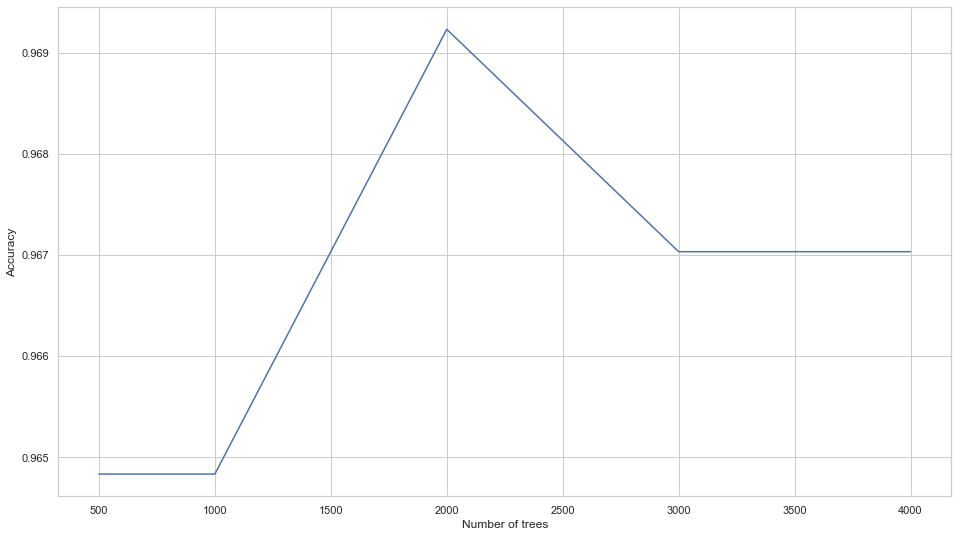

In [29]:
plt.plot([500, 1000, 2000, 3000, 4000], grid_search.cv_results_['mean_test_score'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

## References
* [Introduction to Statistical Learning ISL (Chapter 2)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* [repo from tdpetrou with materials from ISL](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)

* CheckOut: XGBoost, LightGBM, CatBoost
